## **Install Autogen Package**

In [1]:
%%capture
!pip install pyautogen

## **Import Autogen**

In [2]:
import autogen
import subprocess

## **Create a Config List**

In [3]:
config_list = [
    {
        "model" : "gpt-4-1106-preview",
        "api_key" : "secret_key"
    },
        {
        "model" : "gpt-4-vision-preview",
        "api_key" : "secret_key"
    },
]

## **llm configuration**

In [4]:
llm_config = {
    "functions": [
        {
            "name": "python",
            "description": "run cell in ipython and return the execution result.",
            "parameters": {
                "type": "object",
                "properties": {
                    "cell": {
                        "type": "string",
                        "description": "Valid Python cell to execute.",
                    }
                },
                "required": ["cell"],
            },
        },
        {
            "name": "sh",
            "description": "run a shell script and return the execution result.",
            "parameters": {
                "type": "object",
                "properties": {
                    "script": {
                        "type": "string",
                        "description": "Valid shell script to execute.",
                    }
                },
                "required": ["script"],
            },
        },
    ],
    "config_list": config_list,
    "timeout": 120,
}

In [5]:
chatbot = autogen.AssistantAgent(
    name="chatbot",
    system_message="For coding tasks, only use the functions you have been provided with. Reply TERMINATE when the task is done.",
    llm_config=llm_config,
)

In [6]:
user_proxy = autogen.UserProxyAgent(
    name="user_proxy",
    is_termination_msg=lambda x: x.get("content", "") and x.get("content", "").rstrip().endswith("TERMINATE"),
    human_input_mode="NEVER",
    max_consecutive_auto_reply=10,
    code_execution_config={"work_dir": "coding"},
)

## **Define the Functions**

In [7]:
def exec_python(cell):
    ipython = get_ipython()
    result = ipython.run_cell(cell)
    log = str(result.result)
    if result.error_before_exec is not None:
        log += f"\n{result.error_before_exec}"
    if result.error_in_exec is not None:
        log += f"\n{result.error_in_exec}"
    return log

In [8]:
def exec_sh(script):
    return user_proxy.execute_code_blocks([("sh", script)])

## **Register Function**

In [9]:
user_proxy.register_function(
    function_map={
        "python": exec_python,
        "sh": exec_sh,
    }
)

## **Start the Conversation**

user_proxy (to chatbot):

Draw the standart neural network with understandable way, plot it and save as png

--------------------------------------------------------------------------------
chatbot (to user_proxy):

***** Suggested function Call: python *****
Arguments: 
{
  "cell": "import matplotlib.pyplot as plt\nimport numpy as np\n\n# Parameters for the neural network drawing\ninput_layer_size = 3\nhidden_layer_size = 5\noutput_layer_size = 2\n\n# Calculation for the placement of nodes in the graph\nv_spacing = (1 / (input_layer_size + 1))\nh_spacing = (1 / (hidden_layer_size + 1))\n\n# Create a figure\nplt.figure(figsize=(10, 10))\n\n# Draw the input layer\nfor i in range(input_layer_size):\n    plt.scatter(0, i * v_spacing + v_spacing, s=200, c='blue', label='Input Layer' if i == 0 else '')\n\n# Draw the hidden layers\nfor h in range(hidden_layer_size):\n    plt.scatter(1, h * h_spacing + h_spacing, s=200, c='green', label='Hidden Layer' if h == 0 else '')\n\n# Draw the output l

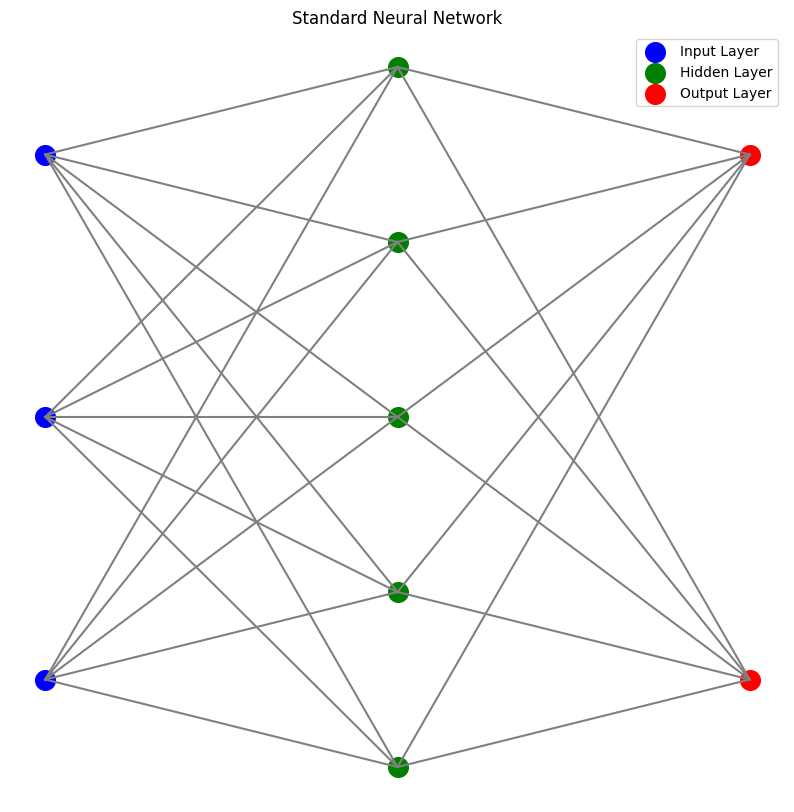

user_proxy (to chatbot):

***** Response from calling function "python" *****
None
***************************************************

--------------------------------------------------------------------------------
chatbot (to user_proxy):

The standard neural network diagram has been drawn and saved as a PNG file named 'standard_neural_network.png'. Would you need any further assistance with this neural network plot?

--------------------------------------------------------------------------------
user_proxy (to chatbot):



--------------------------------------------------------------------------------
chatbot (to user_proxy):

It seems like your message may have been cut off or accidentally left blank. If you have any further questions, need assistance with another task, or if there's anything else I can help you with, feel free to let me know!

--------------------------------------------------------------------------------
user_proxy (to chatbot):



---------------------------

In [10]:
user_proxy.initiate_chat(
    chatbot,
    message="Draw the standart neural network with understandable way, plot it and save as png",
)